In [4]:
from sklearn.datasets import load_breast_cancer
data_set = load_breast_cancer()
print(data_set.feature_names.size)
print(data_set.feature_names)
print(data_set.target_names)
print(data_set.target[3])
data_set.target_names
#list(data_set.target_names)
#is it miligant or benign? 

30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
0


array(['malignant', 'benign'],
      dtype='<U9')

In [5]:
X, y = data_set["data"], data_set["target"]
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Logistic regresion from sklearn

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

#X_train_df = vect.transform(X_train)
#y_train_df = vect.transform(y_train)

model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy_score(y_test,prediction

0.93859649122807021

In [7]:
cross_val_score(model, X, y, cv=5, scoring="f1")

array([ 0.95364238,  0.95238095,  0.97902098,  0.95774648,  0.97142857])

Naive bias from sklearn

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X,y).predict(X)


In [106]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X.shape[0],(y != y_pred).sum()))
cross_val_score(gnb, X, y, cv=5, scoring="f1")

prediction=gnb.predict(X_test)
print("accurancy score:", accuracy_score(y_test,prediction))


Number of mislabeled points out of a total 569 points : 33
accurancy score: 0.956140350877


My own gausian bayes

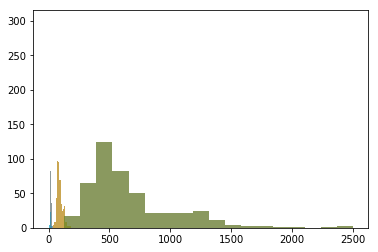

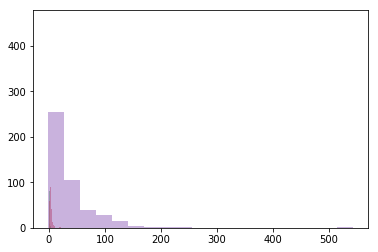

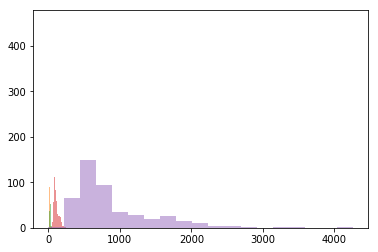

In [14]:
#Check data
###########
import numpy as nu
from matplotlib import pyplot as plt

for i in range (0,9):
    bins = nu.linspace(-1, X_train[:,i].max(),20)
    plt.hist(X_train[:,i], bins, alpha=0.5)
plt.show()
for i in range (9,19):
    bins = nu.linspace(-1, X_train[:,i].max(),20)
    plt.hist(X_train[:,i], bins, alpha=0.5)
plt.show()
for i in range (19,29):
    bins = nu.linspace(-1, X_train[:,i].max(),20)
    plt.hist(X_train[:,i], bins, alpha=0.5)
plt.show()

In [107]:
#calculate gaus parameters for one dimension
#[training set, posible expected variables (1,0), column number in whole data, expected value for this parameters (0 or 1)]
def get_gaus_param(x,y,column,value):
    values=[]    
    for i in range (0,len(x[:,column])):
        if y[i]==value:
            values.append(x[i,column])
    mu=nu.mean(values)
    sigma=nu.var(values)
    return mu, sigma

#calculate gauss parameters for all variables
#training set, array of labels , expected value of label

def get_all_param(x,y,value):
    mu=[]
    sigma=[]
    n_col=x.shape[1]
    for i in range (0,n_col):
        mu1,sigma1=get_gaus_param(x,y,i,value)
        mu.append(mu1)
        sigma.append(sigma1)
    
    return mu,sigma

def normpdf(x, mean, sd):
    var = float(sd)
    pi = 3.1415926
    denom = (2*pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    if ((num/denom)<0.001):
        return 0.001
    else:
        return num/denom
    

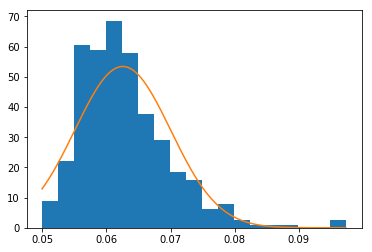

In [108]:

#checking by drawing
import math
import matplotlib.mlab as mlab
a,b=get_all_param(X_train,y_train,0)

malignant_mu,maligant_sigma=get_all_param(X_train,y_train,1)
benigin_mu,benigin_sigma=a,b


nn=9
bins = nu.linspace(X_train[:,nn].min(), X_train[:,nn].max(),20)
plt.hist(X_train[:,nn], bins,normed=1)
#pyplot.show()

xx = nu.arange(X_train[:,nn].min(), X_train[:,nn].max(), 0.0001)
plt.plot(xx, mlab.normpdf(xx, a[nn], math.sqrt(b[nn]) ))
plt.show()
#I should plot only points from bening points, but at least I checked order of magnitude

Check model 

In [109]:
#evaluate model
def point_value(vec):
    malignant_values=[]
    benigin_values=[]
    for i in range (0,len(vec)):
        malignant_values.append(normpdf(vec[i],malignant_mu[i],maligant_sigma[i]))
        benigin_values.append(normpdf(vec[i],benigin_mu[i],benigin_sigma[i]))
        #print("gauss value", malignant_values[-1], benigin_values[-1])

    #for n in malignant_values:
     #   if n<0.01:
      #      malignant_values.remove(n)
    #for n in benigin_values:
     #   if n<0.01:
      #      benigin_values.remove(n)
    
    #print(malignant_values,"\endl",benigin_values)
        
    m_v=nu.prod(malignant_values)
    b_v=nu.prod(benigin_values)
    #print("gaus product: ",m_v,b_v)
    
    if(m_v > b_v):
        return 1
    else:
        return 0

def evaluate_model(x_test,yy_test):
    n=x_test.shape[0]
    print(x_test.shape)
    print(yy_test.shape)
    correctness=[]
    for i in range (0,n):
        value=point_value(x_test[i,:])
        print(value,"\t",yy_test[i])
        if(value==yy_test[i]):
            correctness.append(1)
        else:
            correctness.append(0)
    print(sum(correctness)/n)
    

In [104]:
evaluate_model(X_test,y_test)

(114, 30)
(114,)
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 1
0 	 0
1 	 1
0 	 0
0 	 0
0 	 0
0 	 0
0 	 1
1 	 1
1 	 1
0 	 0
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
1 	 1
1 	 0
1 	 0
1 	 1
1 	 1
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 1
1 	 0
1 	 1
1 	 1
1 	 1
0 	 0
1 	 1
0 	 0
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
1 	 1
1 	 1
1 	 1
1 	 1
0 	 0
0 	 0
0.9385964912280702


In [19]:
ala=[1,2,1,1,0,1,1]
nu.prod(ala)

0